### A Python/Numpy/Matplotlib starter notebook
#### Arrays
1. Execute the the different python scripts (button "play" or  keyboard keys <Shift+Enter> to run the cells) and try to interpret the results:

In [9]:
import numpy as np

x = np.arange(10)
print(x)

y = np.arange(1, 7)
print(y)

z = np.arange(10)[::-1]
print(z)

w = x[10:0:-1]
print(w)

t = np.arange(0, 4, 0.5)
print(t)

a = -10
b = 10
u = np.linspace(a, b, 10)
print(u)

[0 1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6]
[9 8 7 6 5 4 3 2 1 0]
[9 8 7 6 5 4 3 2 1]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5]
[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]


In [1]:
# "#" : is used for comments
# Very useful
help(np.linspace)
# or type: ? np.linspace

In [3]:
for s in u:
    print(s)
    print('hello')
print('end of loop for')
# NB: tabulations define the scope of the loop  

-10.0
hello
-7.777777777777778
hello
-5.555555555555555
hello
-3.333333333333333
hello
-1.1111111111111107
hello
1.1111111111111107
hello
3.333333333333334
hello
5.555555555555557
hello
7.777777777777779
hello
10.0
hello
end of loop for


In [ ]:
for s in u:
    if (s>0):
        print(s)
print("Done !\n");

#### Operations on one-dimensional arrays

2. Execute the the different python scripts (button "play" or  keyboard keys <Shift+Enter> to run the cells) and try to interpret the results:

In [2]:
import numpy as np
#While declaring an np.array, if we only type one pair of [] its shape will be shape(x, ) -> so it will be a 1-dimensional array.
x = np.array([1,  2, 3], dtype=np.float64)
print(x)
y = np.array([3, -2, 1], dtype=np.float64)
print(y)

[1. 2. 3.]
[ 3. -2.  1.]


In [14]:
print(x*y)

[ 3. -4.  3.]


In [11]:
print(2*x)

[2. 4. 6.]


In [12]:
# .T transposes the array (converts from row to column or visca-versa) - has no effect on 1D array.
print(y.T @x)

2.0


In [3]:
# The operator @ is used to get the dot product i.e y @ x = (3*1) + (2 * (-2)) + (3 * 1) = 3 - 4 + 3 = 2
print(y@x)
print(x @ y.T)

2.0
2.0


In [4]:
# BE CAREFUL OF THAT !
# if not numpy arrays, you will get that:
x = [1,2,3]
y = [3,-2,1]
print('x+y = ', x+y)
print(' 2*x = ', 2*x)
print(1.5*x)

In [17]:
# shape(a,b) function takes two parameters: a - number of rows, b - number of columns
x.shape=(3,1); y.shape=(3,1);
print(x)
print(y)
print(x.T)

[[1.]
 [2.]
 [3.]]
[[ 3.]
 [-2.]
 [ 1.]]
[[1. 2. 3.]]


In [19]:
# .shape reports the size of each axis in form of a tuple
z = y.T @ x
print(z)
z.shape

[[2.]]


(1, 1)

In [52]:
# In the example below, x is declared as a 2D array -> shape (3,1) (a column vector)
x = np.array([[1,2,3]]).T
y = np.array([[4,5,6]]).T

# x.T has shape (1,3), y has shape (3,1)
# x.T @ y -> matrix multiplication -> shape (1,3) @ shape (3,1) -> shape (1,1) 
# It's effectively the inner product (scalar in a 2D array)
print(x.T@y)
print(float(x.T@y))  # converts the (1,1) array into a scalar

# x @ y.T -> shape (3,1) @ shape (1,3) -> shape (3,3) (outer product, full matrix)
print(x@y.T)

# A is of shape (3,3)
# x.T @ A -> shape (1,3) @ (3,3) -> shape (1,3)
# (x.T @ A) @ x -> shape (1,3) @ (3,1) -> shape (1,1) 2D array
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
print(x.T@A@x)

# x is now a 1D array (shape (3,))
# 1D arrays are treated as flat row vectors for multiplication with matrices
# x @ A -> 1D array of shape (3,)
# x @ A @ x -> 1D array (shape 3,) @ 1D array (shape 3,) -> scalar (dot product)
x = np.array([1,2,3])
print(x@A@x)

[[32]]
[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
[[12]]
12


In [22]:
# This won't work as the inner dimmensions are not equal
# x is of shape(3,) -> 1D Array
# y is of shape (3,1) -> 2D Array
# y.T is transposed to shape(1,3) therefore matrix multiplication cannot work

print(x @ y.T)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

#### ! References and copy of variables
3. Execute the code snippet and try to understand what happens.

In [24]:
x = np.array([1, 2, 3], dtype=np.float64)
#y is just a reference in memory of x, y[0] points to the same position as x[0], therefore changing this in memory for y will also change it for x
y = x
y[0] = 5
print(y)
print(x,"\n")

[5. 2. 3.]
[5. 2. 3.] 



In [27]:
z = x + 0
# The upper result creates another array as a result of adding 0 to each of x's element. Changing elements of z does not affect x as it points to different address in memory.
z[1] = 6
print(z)
print(x,"\n")

[5. 6. 3.]
[5. 2. 3.] 



In [28]:
x = np.array([1, 2, 3], dtype=np.float64)
y = 2*x
print(y)
print(x,"\n")
z = x.copy()
z[0] = 5
print(z)
print(x)

[2. 4. 6.]
[1. 2. 3.] 

[5. 2. 3.]
[1. 2. 3.]


#### Matrices, multiplications of matrices
4. Run the code snippets below and interpret the results

In [29]:
x = np.array([1, 2, 3], dtype=np.float64) #  (array 1d)
print(x.shape)
print(x) # array
print(x[:, np.newaxis]) # matrix (here column vector)
x = x[:, np.newaxis]
print(x.shape)

(3,)
[1. 2. 3.]
[[1.]
 [2.]
 [3.]]
(3, 1)


In [32]:
A = np.array([[1, 2], [3, 4], [5, 6], [7, 8]], dtype=np.float64);
print(A)

# ndim tells the dimension of an array
print(A.ndim)

# size tells the number of elements
print(A.size)

r, c = A.shape
print(r, " ", c)

A.shape=((8,1))
print(A)

# reshape(a,b) creates another matrix based on the dimensions where a x b = size
newarr = A.reshape(4, 2)
print(newarr)

[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]
2
8
4   2
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]]
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]


In [33]:
B = A.T; # transposed vector
print(B);

[[1. 2. 3. 4. 5. 6. 7. 8.]]


In [35]:
print(A@B)

[[ 1.  2.  3.  4.  5.  6.  7.  8.]
 [ 2.  4.  6.  8. 10. 12. 14. 16.]
 [ 3.  6.  9. 12. 15. 18. 21. 24.]
 [ 4.  8. 12. 16. 20. 24. 28. 32.]
 [ 5. 10. 15. 20. 25. 30. 35. 40.]
 [ 6. 12. 18. 24. 30. 36. 42. 48.]
 [ 7. 14. 21. 28. 35. 42. 49. 56.]
 [ 8. 16. 24. 32. 40. 48. 56. 64.]]


In [36]:
print(B@A)

[[204.]]


In [34]:
print(A*B)

[[ 1.  2.  3.  4.  5.  6.  7.  8.]
 [ 2.  4.  6.  8. 10. 12. 14. 16.]
 [ 3.  6.  9. 12. 15. 18. 21. 24.]
 [ 4.  8. 12. 16. 20. 24. 28. 32.]
 [ 5. 10. 15. 20. 25. 30. 35. 40.]
 [ 6. 12. 18. 24. 30. 36. 42. 48.]
 [ 7. 14. 21. 28. 35. 42. 49. 56.]
 [ 8. 16. 24. 32. 40. 48. 56. 64.]]


In [37]:
S = A @ A.T;
print(S)

[[ 1.  2.  3.  4.  5.  6.  7.  8.]
 [ 2.  4.  6.  8. 10. 12. 14. 16.]
 [ 3.  6.  9. 12. 15. 18. 21. 24.]
 [ 4.  8. 12. 16. 20. 24. 28. 32.]
 [ 5. 10. 15. 20. 25. 30. 35. 40.]
 [ 6. 12. 18. 24. 30. 36. 42. 48.]
 [ 7. 14. 21. 28. 35. 42. 49. 56.]
 [ 8. 16. 24. 32. 40. 48. 56. 64.]]


In [39]:
# ones(shape) creates a matrix with the specified shape (tuple) filled with 1.
A = np.ones((3,4)); print(A)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [40]:
# ones(shape) creates a matrix with the specified shape (tuple) filled with 0.
B = np.zeros((2,3)); print(B)

[[0. 0. 0.]
 [0. 0. 0.]]


In [42]:
# eye(n) creates the identity matrix of size n
C = np.eye(4); print(C)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [44]:
# diag(array) creates a square matrix with the same size of the parameter array and its elements as diagonal
D = np.diag(np.array([4, 5, 6])); print(D)

[[4 0 0]
 [0 5 0]
 [0 0 6]]


In [48]:
# The second parameter specifies which diagonal
E = np.diag(np.array([4, 5, 6]), 0) + np.diag(np.array([-1, -1]), 1); print(E)

[[4 0 0]
 [0 5 0]
 [0 0 6]]
[[ 0 -1  0]
 [ 0  0 -1]
 [ 0  0  0]]


#### Stacking
5. The numpy functions ```np.hstack()``` et ```np.vstack()``` are useful to stack vectors in a matrix, either horizontally or vertically. Run the cells below.

In [53]:
# column vectors
# hstack() -> creates a matrix joining vectors in columns.
q1 = np.array([[1,2,3]]).T
q2 = np.array([[4,5,6]]).T
q3 = np.array([[7,8,9]]).T
Q  = np.hstack((q1,q2,q3))
print(Q, "\n")

# row vectors
# vstack() -> creates a matrix joining vectors in rows.
r1 = np.array([1,2,3])
r2 = np.array([4,5,6])
r3 = np.array([7,8,9])
R  = np.vstack((r1,r2,r3))
print(R)

[[1 4 7]
 [2 5 8]
 [3 6 9]] 

[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### Accessors
6. Run the cells below

In [54]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]], dtype=np.float64);
print(A)

# Slices include start, exclude stop | start:stop:step
print(A[1:3,1:3])
print("Using -1") #excludes the last column
print(A[1:-1, 1:-1])

#  means to the end
print(A[1,:]) # print everything of row with index = 1

print(A[:,2]) # print everything of column with index = 2

print(A[:,2:3]) # (slicing) | print everything on column from 2 to 3 (3 is exclusive) so only column with index 2

# change the element in position (-1,-1) -> indexing is circular so it means the [last row, last column]
A[-1,-1] = 100
print(A)

# print row of index = 2, everything on the row, in step -1 (reverse)
print(A[2,::-1])

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
[[5. 6.]
 [8. 9.]]
Using -1
[[5.]
 [8.]]
[4. 5. 6.]
[ 3.  6.  9. 12.]
[[ 3.]
 [ 6.]
 [ 9.]
 [12.]]
[[  1.   2.   3.]
 [  4.   5.   6.]
 [  7.   8.   9.]
 [ 10.  11. 100.]]
[9. 8. 7.]


#### Linear algebral module 'linalg' of 'numpy'
7.The linear algebra module `linalg` of `numpy` gives materials and methods such as solutions of linear systems, norms, determinant, eigenvalues and eigenvectors, matrix inverses, ... 

In [65]:
import numpy.linalg as la

b = np.array([[1, 1, 1]], dtype=np.float64).T
A = np.array([[3, -1, -1], [-1, 3, -1], [-1, -1, 3]], dtype=np.float64)
x = la.solve(A, b)
# Verif
print(x, "\n\n", A@x-b)

[[1.]
 [1.]
 [1.]] 

 [[0.]
 [0.]
 [0.]]


In [66]:
# eig(A) returns eigenvalues and eigenvectors of the matrix (tuple) | Av = yv -> (A-yI) = 0 -> det(A-yI)v = 0
D, V = la.eig(A)
print(D)
print(V)
print(V.T @ V) 

[4. 1. 4.]
[[ 0.81649658 -0.57735027  0.19434127]
 [-0.40824829 -0.57735027 -0.78395561]
 [-0.40824829 -0.57735027  0.58961434]]
[[ 1.00000000e+00 -1.11022302e-16  2.38018475e-01]
 [-1.11022302e-16  1.00000000e+00 -4.44089210e-16]
 [ 2.38018475e-01 -4.44089210e-16  1.00000000e+00]]


In [69]:
# inv(A) gives the inverse of a matrix such that A * A- = I
print(la.inv(A), '\n', A @ la.inv(A))

[[0.5  0.25 0.25]
 [0.25 0.5  0.25]
 [0.25 0.25 0.5 ]] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [72]:
# norm of a vector sqrt(Aij ^2)
print(la.norm(x))

1.7320508075688772


In [ ]:
A = np.array([[1,0,0,0], [-1, 1, 0,0],[0, -1,1,0], [0,0,-1,1]]);
print(A)
C = la.inv(A)
print(C)

#### Functions
8. With python, function definitions are simple. Run the code snippet below:

In [55]:
def myFunction(x):
    fx = x * np.sin(np.pi *x) - np.exp(-x)
    return fx
print(myFunction(3))

-0.04978706836786284


In [ ]:
# With 2 output values
def myFun2(x):
    fx = x**3
    fprimx = 3*x**2
    return fx, fprimx
f1, fprim1 = myFun2(1.0)
print(f1, fprim1)

In [ ]:
def fact(n):
    """Factorial function fact(n) = n!"""
    if not isinstance(n, int):
        raise TypeError("Eror: non integer entry argument: ", type(x))
    if (n==0):
        return 1
    else:
        return (n*fact(n-1))

help(fact)
print(fact(5))
print(fact(2.3))

#### Graphics with Matplotlib
9. The ```Matplotlib``` module gives material and method for plotting and visualization. The most useful command is `plot()`. Run the python code below.

Text(0.5, 1.0, 'A nice function')

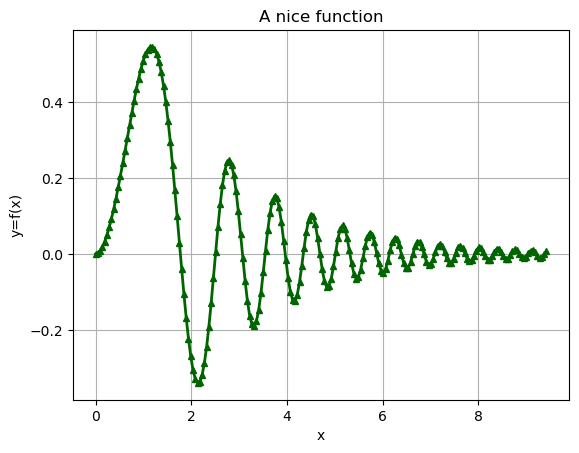

In [11]:
def myfunc(x):
    return (np.sin(x**2) * np.exp(-x/2))

import matplotlib.pyplot as plt

Npt = 200
x = np.linspace(0, 3*np.pi, Npt);
plt.plot(x, myfunc(x), color='darkgreen', marker='^', linestyle='-',
         linewidth=2, markersize=4)
plt.grid()
plt.xlabel('x'); plt.ylabel('y=f(x)'); plt.title('A nice function')

### Exercise 1
Let $f$ be the function
$$
f(x) = 2\left( \sqrt{x^2+1}-x \right).
$$
Consider the vector
$$
x = [10^0\ 10^1\ 10^2\ 10^3\ ...\ 10^{16}]
$$
In graphics, plot the differents points $(i, f(x_i))$, $i=0,...,16$. 

Also display the array composed of $f(x_i)$ using `print()`. Is this result expected ? How to explain this result ?

[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10 1.e+11 1.e+12 1.e+13 1.e+14 1.e+15 1.e+16]
[8.28427125e-01 9.97512422e-02 9.99975001e-03 9.99999750e-04
 1.00000001e-04 9.99998883e-06 1.00000761e-06 1.00582838e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


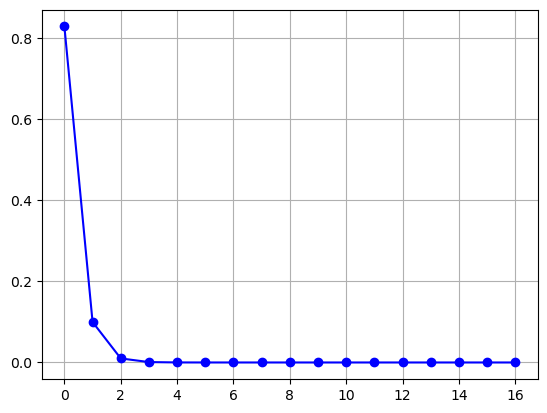

In [23]:
def f(x):
    return (2*(np.sqrt(x**2+1) - x))
I = np.arange(0, 17, dtype=np.float64)

x = pow(10.0, I)
print(x)
print(f(x))
plt.plot(I, f(x), color = 'blue', marker='o')
plt.grid()  

By multiplying with the conjugate quantity, one can rewrite $f$ with the mathematically equivalent expression:
$$
g(x) = \frac{2}{\sqrt{x^2+1}+x} \quad (=f(x)).
$$
What is the asymptotic behaviour when $x$ is big ?
Display the array of $g(x_i)$ by using `print()`. What do you observe ?
In another graphics, plot the curve $(x_i, g(x_i))$, $i=0,...,16$ in $\log$ scale.
(you can used `plt.loglog()` for that).

Run this snippet. Conclusion ?

[8.28427125e-01 9.97512422e-02 9.99975001e-03 9.99999750e-04
 9.99999997e-05 1.00000000e-05 1.00000000e-06 1.00000000e-07
 1.00000000e-08 1.00000000e-09 1.00000000e-10 1.00000000e-11
 1.00000000e-12 1.00000000e-13 1.00000000e-14 1.00000000e-15
 1.00000000e-16]


Text(0, 0.5, 'g(x)')

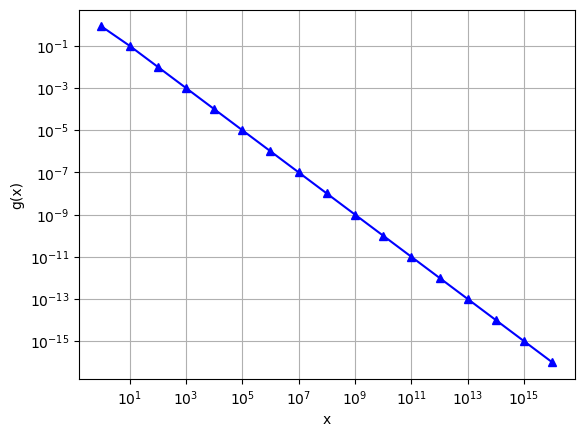

In [35]:
def g(x):
    return (2 / (np.sqrt(x**2 + 1) + x))
print(g(x))

plt.loglog(x, g(x), color = "blue", marker = "^")
plt.grid()

plt.xlabel("x")
plt.ylabel("g(x)")

In [36]:
xfloat32 = np.exp(I*np.log(10), dtype=np.float32)
print(f(xfloat32))
print(f(x))
print(g(x))

[0.8284271  0.09975243 0.00999451 0.00097656 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
[8.28427125e-01 9.97512422e-02 9.99975001e-03 9.99999750e-04
 1.00000001e-04 9.99998883e-06 1.00000761e-06 1.00582838e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[8.28427125e-01 9.97512422e-02 9.99975001e-03 9.99999750e-04
 9.99999997e-05 1.00000000e-05 1.00000000e-06 1.00000000e-07
 1.00000000e-08 1.00000000e-09 1.00000000e-10 1.00000000e-11
 1.00000000e-12 1.00000000e-13 1.00000000e-14 1.00000000e-15
 1.00000000e-16]


### Exercise nb 2
One can approximate the value of the derivative of a function at a point $x_0$ 
from the finite difference formula 

$$
\Delta_h(x_0) = \frac{f(x_0+h)-f(x_0)}{h}\quad (\approx f'(x_0))
$$

for a small enough spatial step $h\neq 0$. For $f(x)=\sqrt{x}$ and $x_0=1$, we have $f'(x_0)=\frac{1}{2}$.
Using python, implement the following array $h=(h_i)_i$ defined by

$$
h = [10^0\ 10^{-1}\ 10^{-2}\ 10^{-3}\ ...\ 10^{-19}\ 10^{-20}]
$$

and the vector of approximation error $e_h=(e_{h,i})_i$ where

$$
e_{h,i}(x_0) = |\Delta_{h_i}(x_0) - f'(x_0)|.
$$

Plot a graphics of the curve $(h_i, e_{h_i}(x_0)$ in $\log$ scale. What is surprinsing ? Try to interpret. 

h = [1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08 1.e-09
 1.e-10 1.e-11 1.e-12 1.e-13 1.e-14 1.e-15 1.e-16 1.e-17 1.e-18 1.e-19
 1.e-20]
errors = [8.57864376e-02 1.19115183e-02 1.24378879e-03 1.24937539e-04
 1.24993760e-05 1.24999683e-06 1.24941224e-07 1.19205197e-08
 3.03873549e-09 4.13701855e-08 4.13701855e-08 4.13701855e-08
 4.44502912e-05 3.99638919e-04 1.15018692e-02 5.59107901e-02
 5.00000000e-01 5.00000000e-01 5.00000000e-01 5.00000000e-01
 5.00000000e-01]


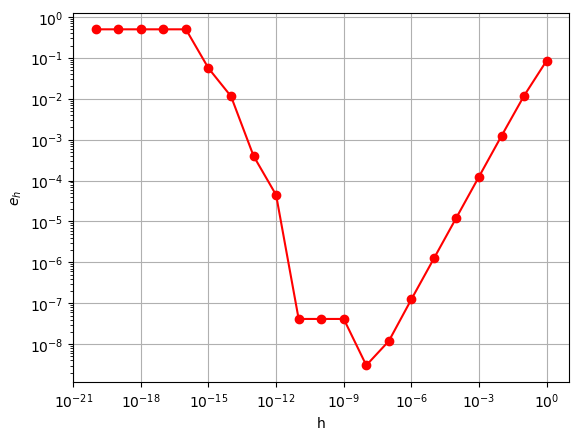

In [57]:
def f(x):
    return np.sqrt(x)

x0 = 1

I = np.arange(21, dtype=np.float64)
h = 10.0**(-I)

# forward difference formula
Delta_h = (f(x0 + h) - f(x0)) / h

# error compared to exact derivative 0.5
e = abs(Delta_h - 0.5)

print("h =", h)
print("errors =", e)

# log-log plot
plt.loglog(h, e, 'o-r')
plt.xlabel("h")
plt.ylabel("$e_h$")
plt.grid()

For big values the error is very high (1, 0,1)  
For medium values is the best interval because the error drops significantly  
For small values the computer subtracts the values incorrectly therefore they are mostly considered as integers and not floats